In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('linear_data.csv') 
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [3]:
df[['x']].head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [4]:
df['y'].head()

0    4.447692
1    5.024612
2    5.869593
3    4.722490
4    4.877101
Name: y, dtype: float64

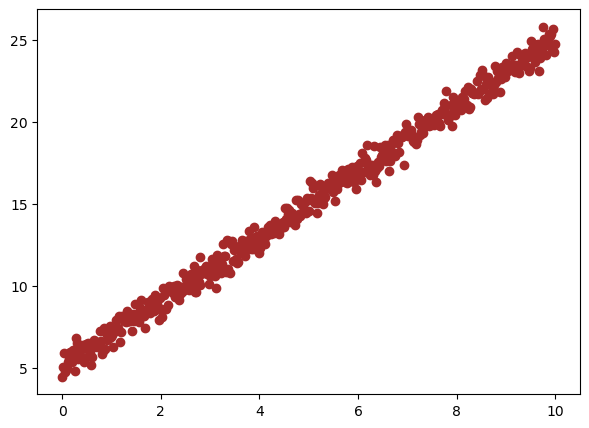

In [5]:
plt.figure(figsize=(7,5))
#plt.scatter(df[['x']],df['y'],color='brown')
plt.scatter(df.x,df.y,color='brown')

In [6]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [7]:
df2=pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


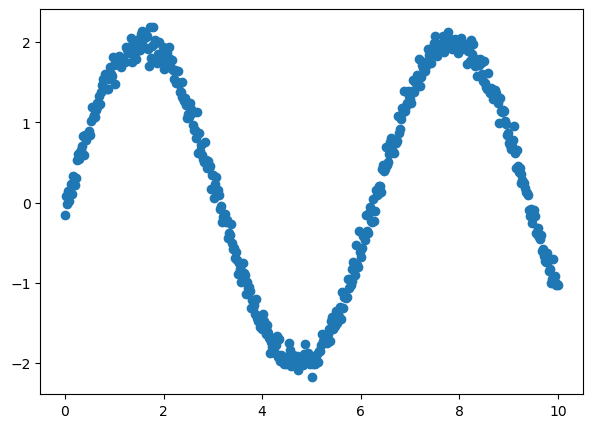

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(df2[['x']],df2['y'])

In [9]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


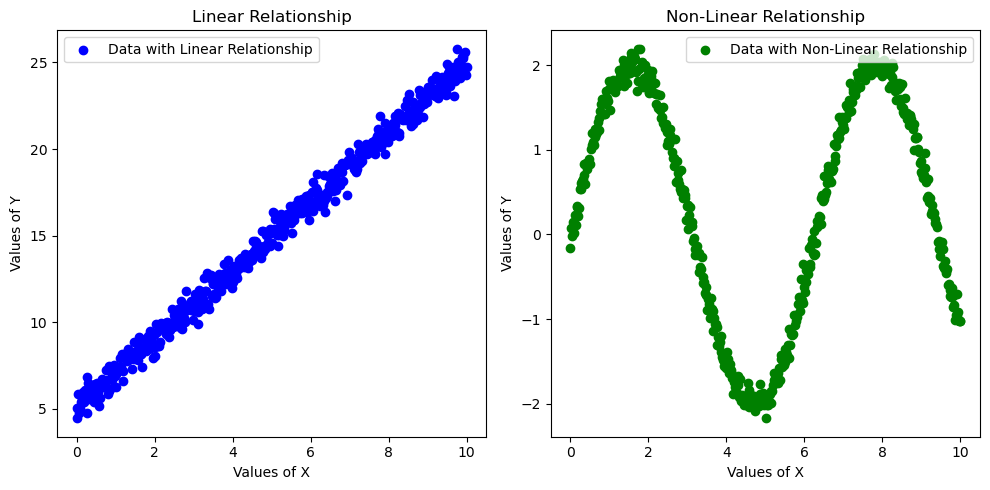

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df.x,df.y,color='blue',label='Data with Linear Relationship')
plt.xlabel('Values of X')
plt.ylabel('Values of Y')
plt.title('Linear Relationship')
plt.legend()



plt.subplot(1,2,2)

plt.scatter(df2.x,df2.y,color='green',label='Data with Non-Linear Relationship')
plt.xlabel('Values of X')
plt.ylabel('Values of Y')
plt.title('Non-Linear Relationship')
plt.legend()

plt.tight_layout()
plt.savefig('Linear & Non-Linear Relationship')
plt.show()

In [11]:
corr_linear=np.corrcoef(df.x,df.y)
print("Correlation coefficient for linear relationship :\n",corr_linear)

Correlation coefficient for linear relationship :
 [[1.         0.99643985]
 [0.99643985 1.        ]]


In [12]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [13]:
corr_Nonlinear=np.corrcoef(df2.x,df2.y)
print("Correlation coefficient for linear relationship :\n",corr_Nonlinear)

Correlation coefficient for linear relationship :
 [[ 1.         -0.06573583]
 [-0.06573583  1.        ]]


In [14]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [17]:
reg1=LinearRegression()

In [18]:
reg1.fit(df[['x']],df['y'])

LinearRegression()

In [19]:
reg1.score(df[['x']],df['y'])

0.9928923730526016

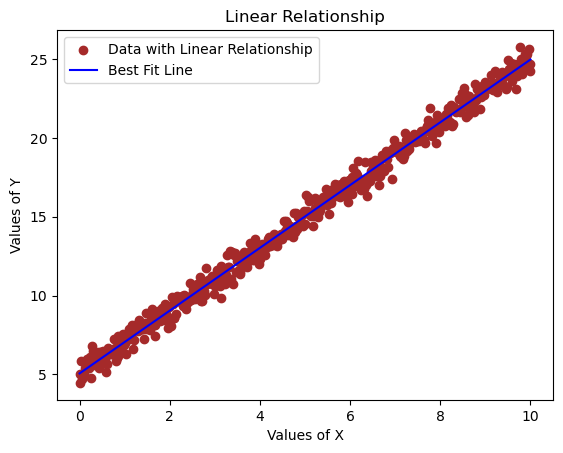

In [20]:
plt.scatter(df[['x']],df.y,color='brown',label='Data with Linear Relationship')
plt.plot(df[['x']],reg1.predict(df[['x']]),color='blue',label='Best Fit Line')
plt.xlabel('Values of X')
plt.ylabel('Values of Y')
plt.title('Linear Relationship')
plt.legend()

In [21]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [22]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [23]:
reg2=LinearRegression()

In [24]:
reg2.fit(df2[['x']],df2.y)

LinearRegression()

In [25]:
reg2.score(df2[['x']],df2.y)

0.004321199719043656

In [26]:
reg2.score(df2[['x']],df2.y)*100

0.4321199719043656

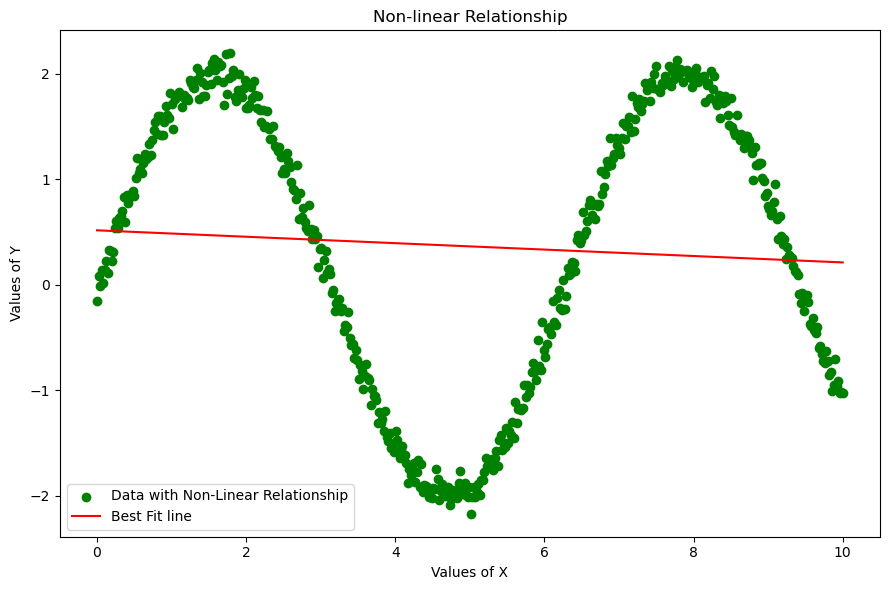

In [27]:
plt.figure(figsize=(9,6))
plt.scatter(df2.x,df2.y,color='green',label='Data with Non-Linear Relationship')
plt.plot(df2[['x']],reg2.predict(df2[['x']]),color='red',label='Best Fit line')
plt.xlabel('Values of X')
plt.ylabel('Values of Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures


In [29]:
poly=PolynomialFeatures(degree=7)
X_poly=poly.fit_transform(df2[['x']])

In [30]:
X_poly.shape

(500, 8)

In [31]:
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11,1.298064e-12
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09,1.661522e-10
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08,2.838866e-09
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07,2.126748e-08


In [32]:
df2.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [33]:
reg_poly=LinearRegression()

In [34]:
reg_poly.fit(X_poly,df2.y)

LinearRegression()

In [35]:
reg_poly.score(X_poly,df2.y)

0.9936598606222056

In [36]:
reg_poly.score(X_poly,df2.y)*100

99.36598606222056

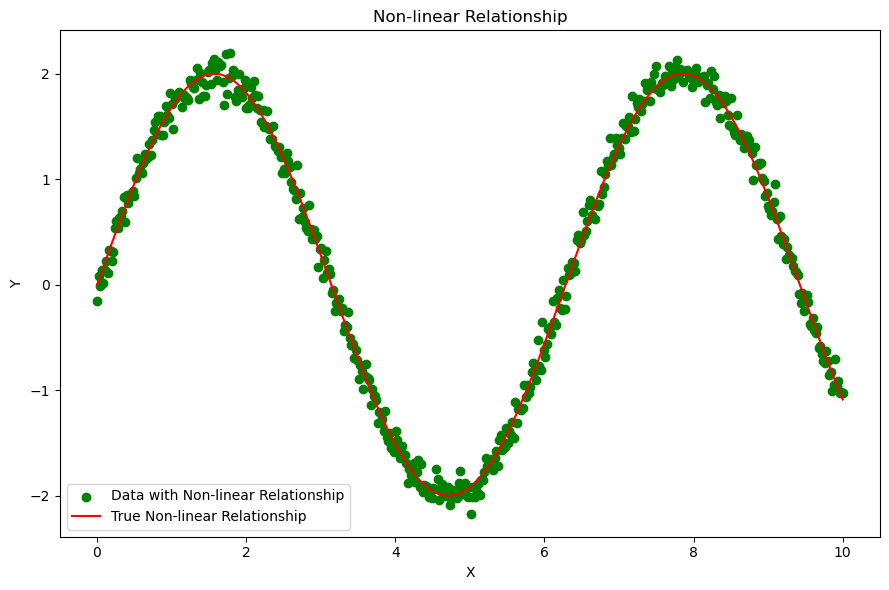

In [37]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2.x, 2 * np.sin(df2.x), color='red', label='True Non-linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
xtrain,xtest,ytrain,ytest=tts(X_poly,df2.y,test_size=0.25,random_state=42)

In [40]:
xtrain.shape

(375, 8)

In [41]:
pd.DataFrame(xtrain).head()

,0,1,2,3,4,5,6,7
0,1.0,4.549098,20.694294,94.140377,428.253821,1948.168683,8862.410644,4.031598e+04
1,1.0,8.356713,69.834659,583.588235,4876.879639,40754.685563,340575.228054,2.846090e+06
2,1.0,4.068136,16.549733,67.326568,273.893654,1114.236707,4532.866762,1.844032e+04
3,1.0,2.525050,6.375878,16.099411,40.651820,102.647883,259.191048,6.544704e+02
4,1.0,6.593186,43.470107,286.606514,1889.650163,12458.815705,82143.293924,5.415860e+05


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [43]:
reg_poly.fit(xtrain,ytrain)

LinearRegression()

In [44]:
reg_poly.score(xtrain,ytrain)

0.9939630254401292

In [45]:
reg_poly.score(xtest,ytest)

0.9923172867584122